In [ ]:
# The data set is from http://data.boston.gov/. 
# It is a summary of government employee earning on 2017.
# First, I will import necessary modules.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure,output_file,show
from bokeh.io import output_notebook
output_notebook()
%matplotlib inline
import sklearn
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
import statsmodels.api as smf

Loading BokehJS ...

In [19]:
import csv
import requests

CSV_URL = 'https://data.boston.gov/dataset/418983dc-7cae-42bb-88e4-d56f5adcf869/resource/70129b87-bd4e-49bb-aa09-77644da73503/download/employee-earnings-report-2017.csv'
download = requests.Session().get(CSV_URL)
decoded_content = download.content.decode('utf-8')
cr = csv.reader(decoded_content.splitlines(),delimiter='0')
my_list = list(cr)
for row in my_list:
    print(row)
# I can download the data set directly from website, but I'm not sure how to delete $ before every number
# So I used Excel to change the format. and uploaded the cleaned-up one.

['NAME,DEPARTMENT NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS,POSTAL']
['Miller,Francis T,Boston Police Department,Police Lieutenant (Det),"$129,53', '.83 ",,"$13,694.5', ' ","$8,15', '.41 ",,,"$24,286.86 ","$175,662.6', ' ",2', '43']
['Sullivan,Patrice Murphy,Boston Police Department,Office Manager,"$56,921.8', ' ",,"$3,594.65 ","$1,548.16 ",,,,"$62,', '64.61 ",2132']
['O\'Hara,Michael C,Boston Police Department,Police Lieutenant,"$124,', '56.64 ",,"$6,432.23 ","$29,', '43.67 ",,"$22,385.', '', ' ","$23,26', '.69 ","$2', '5,178.23 ",2', '21']
['Whalen,Richard L,Boston Police Department,Police Detective,"$94,956.25 ","$4,985.32 ","$13,591.93 ","$85,419.22 ",$58.', '3 ,"$16,33', '.', '', ' ","$19,971.', '1 ","$235,311.76 ",2', '62']
['Kelly,Ann Marie,Boston Police Department,Tape Librarian I (BPD),"$69,995.34 ",,$3', '', '.', '', ' ,"$7,961.', '8 ",,,,"$78,256.42 ",219', '']
['Carroll,William F,Boston Police Department,Police Offc/Hosp

['Otuechere,Samuel O,BPS Substitute Teachers/Nurs,Substitute Teacher HE,"$18,353.65 ",,$27.5', ' ,,,,,"$18,381.15 ",213', '']
['Gutierrez,Claudia M,Umana Middle,Principal Middle,"$149,853.33 ",,,,,,,"$149,853.33 ",2136']
['Canavan,Ann M,BPS Counseling Service,School Psychologist(1),"$1', '4,674.66 ",,"$1,39', '.5', ' ",,,,,"$1', '6,', '65.16 ",2132']
['Hulbert,George J,BPS Facility Management,Jr Cust/Nights,,,"$1', ',199.94 ",,,,,"$1', ',199.94 ",2131']
['Prince,Gerard D,BPS Facility Management,Sen Cust C/Nights,"$68,458.15 ",,$17.5', ' ,"$1', ',669.46 ",,,,"$79,145.11 ",1867']
['Glavin,Daniel,BPS Facility Management,Area Manager,"$99,128.74 ",,"$2,717.5', ' ",,,,,"$1', '1,846.24 ",2', '48']
['Stanton,Gerald P,BPS Facility Management,Sen Cust C,"$46,997.13 ",,,$27', '.68 ,"$14,119.66 ",,,"$61,387.47 ",2322']
['Smith,Kevin L,BPS Facility Management,Sen Cust C,"$62,551.95 ",,$17.5', ' ,"$3,771.28 ",,,,"$66,34', '.73 ",2129']
['Hurley,Jeannette M,BPS Facility Management,Sen Cust C,"$71,54

['Singletary,Cheryl,Neighborhood Development,Program Asst,"$64,561.43 ",,$275.', '', ' ,,,,,"$64,836.43 ",2125']
['Butterworth,Charlotte,Boston Retirement System,Admin Asst (Finance),"$84,173.97 ",,"$1,918.73 ","$1,249.44 ",,,,"$87,342.14 ",2131']
['Gleeson,John A,Treasury-Treasury Division,Supv-Accounting,"$95,378.82 ",,,"$5,753.', '7 ",,,,"$1', '1,131.89 ",2136']
['Ball,Thomas H.,Assessing Department,Prin Admin Asst,"$97,647.', '3 ",,$3', '', '.', '', ' ,,,,,"$97,947.', '3 ",2132']
['Christopher,Allyn A.,Neighborhood Services,Staff Asst I,"$54,', '1', '.79 ",,$415.47 ,"$1,', '38.67 ",,,,"$55,464.93 ",2128']
['Dimarzo,Dominic,Traffic Division,Traffic Signal Supv,"$1', '7,', '79.81 ",,$656.22 ,"$38,689.65 ",,,,"$146,425.68 ",2128']
['Judge,Joyce M.,Office of Tourism,Staff Asst II,"$65,194.42 ",,"$1,248.93 ",,,,,"$66,443.35 ",2136']
['Lyons,Patricia Anne,Boston Retirement System,Admin Asst (Finance),"$84,168.37 ",,$392.5', ' ,"$6,619.69 ",,,,"$91,18', '.56 ",2184']
['Williamson,James Mi

['Jordan,Veronica A.,Boston Public Library,Spec Library Asst I (Branch),"$53,', '12.9', ' ",,,$917.52 ,,,,"$53,93', '.42 ",2126']
['Lee,Anna,Boston Public Library,Spec Library Asst III,"$59,933.5', ' ",,$3', '', '.', '', ' ,$3.5', ' ,,,,"$6', ',237.', '', ' ",2135']
['Stegemann,Stephen C.,BPS Facility Management,Sen Custodian,"$59,725.5', ' ",,$17.5', ' ,"$12,532.', '3 ",,,,"$72,275.', '3 ",2135']
['Bonds,Angela Patrice,Boston Public Library,Childrens Librarian II,"$71,462.61 ",,"$1,182.36 ","$3,651.67 ",,,,"$76,296.64 ",2119']
['Monteiro,Agnaldo P,Boston Police Department,Police Detective,"$89,178.18 ","$15,', '73.41 ","$2,886.87 ","$73,497.6', ' ",,"$12,972.', '', ' ","$18,458.', '4 ","$212,', '66.1', ' ",2121']
['Gillespie III,Robert D.,BPS Facility Management,Sen Cust C,"$56,471.', '5 ",,$17.5', ' ,"$8,242.34 ",,,,"$64,73', '.89 ",2128']
['Antoine,Jean,Boston Public Library,Adults Librarian II,"$71,959.71 ",,"$1,383.84 ",,,,,"$73,343.55 ",2136']
['Grupee,Arthur,Boston Cntr - Youth 

['Lake,Nadine S,BPS Ellis Elementary,Paraprofessional,"$29,892.69 ",,,,,,,"$29,892.69 ",2126']
['Jacobs,Lynne R.,"Kennedy, PJ Elementary",Nurse,"$88,164.14 ",,$27.5', ' ,,,,,"$88,191.64 ",2478']
['Knight,Allen F.,Boston Public Library,Branch Librarian II,"$87,', '41.2', ' ",,,"$2,797.74 ",,,,"$89,838.94 ",2121']
['Chin,Su Mei,BPS Quincy Elementary,Lunch Hour Monitors,"$8,748.', '6 ",,$27.5', ' ,,,,,"$8,775.56 ",2118']
['Harrington,Cedric C,Inspectional Services Dept,Dog Offcr(Sr Animal Cntl Ofcr),"$76,473.54 ","$1,', '', '9.', '2 ",$65', '.', '', ' ,,,,,"$78,132.56 ",2125']
['Egan,Walter T,Inspectional Services Dept,Dog Offr(AnimalControlOffcr)##,"$6', ',', '55.26 ",$824.99 ,$65', '.', '', ' ,"$5,1', '4.4', ' ",,,,"$66,634.65 ",2122']
['Osorio,Maria A,BPS Horace Mann,Community Field Coordinator,"$41,694.17 ",,,,,,,"$41,694.17 ",2135']
['King,Jeffrey,Boston Police Department,Police Officer,"$85,254.', '2 ","$3,6', '3.95 ",$8', '', '.', '', ' ,"$13,', '', '7.12 ",,"$24,932.', '', ' ","$1

['Lawlor,James F.,BPS Facility Management,Sen Cust C,"$58,133.', '8 ",,,"$5,818.97 ",,,,"$63,952.', '5 ",2472']
['O\'Rourke,Michael F,BPS Facility Management,Sen Cust C,"$58,78', '.58 ",,$17.5', ' ,"$9,', '22.54 ",,,,"$67,82', '.62 ",2129']
['DiAngelis,Michael P.,BPS Facility Management,Head Grounds Keeper,"$71,911.26 ",,"$3,', '', '', '.', '', ' ",,,,,"$74,911.26 ",2132']
['Norton,Michael E,Boston Fire Department,Fire Fighter,"$1', '6,524.', '', ' ",,"$1,265.96 ","$22,462.26 ",,,,"$13', ',252.22 ",2132']
['Meehan,Kevin F,Boston Fire Department,Fire Lieutenant,"$117,786.42 ",,$55', '.', '', ' ,"$15,479.64 ","$9,868.85 ",,,"$143,684.91 ",2122']
['Nogueira,Frank,Boston Police Department,Police Offc Mobile Offc 2$6,"$88,977.74 ","$3,6', '3.25 ","$4,', '89.23 ","$32,886.12 ",,$184.', '', ' ,,"$129,74', '.34 ",2113']
['Merced,Joseph P,Traffic Division,Sr Traffic Maint Person##,"$46,', '84.97 ",$679.35 ,$615.', '2 ,"$3,581.', '3 ",,,,"$5', ',96', '.37 ",2128']
['Harmon,Brenda,Boston Police D

['Beauvais,Catherine Spencer,Baldwin ELC,Surround Care Paraprofessional,"$12,684.', '', ' ",,,,,,,"$12,684.', '', ' ",2135']
['Duca,Annette Marie,BPS Blackstone Elementary,Cluster Substitute,"$16,367.8', ' ",,,,,,,"$16,367.8', ' ",2128']
['Newton Jr.,John Harvey,ASD Purchasing Division,Mailroom Equipment Operator,"$61,882.89 ",,$3', '', '.', '', ' ,"$1', ',4', '2.62 ",,,,"$72,585.51 ",2122']
['Ranero,Jose M.,Boston Police Department,Police Officer,,,"$8,723.63 ",,"$94,359.39 ",,,"$1', '3,', '83.', '2 ",2', '35']
['Brown,Talia Grace-Etedgee,BPS Orchard Gardens K-8 Pilot,Teacher,"$92,987.65 ",,"$4,536.7', ' ",,,,,"$97,524.35 ",2155']
['Andrade,Eunice M,Boston Public Library,Asst Prin Accountant,"$78,63', '.25 ",,"$1,752.', '9 ",,,,,"$8', ',382.34 ",2125']
['Smith,Kristen Aries,BPS Ohrenberger Elementary,Teacher,"$1', '1,698.29 ",,,,,,,"$1', '1,698.29 ",2', '21']
['Aponte,Pablo,BPS School Safety Service,Officer-Bps Police,"$48,348.', '4 ",,$65', '.', '', ' ,"$3,556.75 ",,,,"$52,554.79 ",2

['Judge,Jaida,Eliot K-8,Paraprofessional,"$12,', '67.16 ",,,,,,,"$12,', '67.16 ",2124']
['Boudreau,Jessica Murphy,Traffic Division,Parking Meter Supervisor,"$44,758.33 ",$56', '.69 ,$5', '', '.', '', ' ,"$2,246.33 ",,,,"$48,', '65.35 ",2136']
['McKinnon,Luke,BPS Substitute Teachers/Nurs,Substitute Teacher,$566.', '8 ,,,,,,,$566.', '8 ,2132']
['Corrado,Kailyn,BPS Substitute Teachers/Nurs,Substitute Teacher HE,"$2', ',669.69 ",,,,,,,"$2', ',669.69 ",2127']
['Hall-Queen,Janise Tashay,BPS Blackstone Elementary,Paraprofessional,"$1', ',18', '.33 ",,,,,,,"$1', ',18', '.33 ",2189']
['Dejesus,Janycia Marie,Traffic Division,Parking Meter Supervisor,"$44,313.93 ",$569.67 ,$5', '', '.', '', ' ,"$2,9', '8.83 ",,,,"$48,292.43 ",2136']
['Joyce Jr.,Richard J,Property Management,Security Offc (Prot Ser),"$42,429.19 ",,$6', '', '.', '', ' ,"$3,563.29 ",,$36', '.', '', ' ,,"$46,952.48 ",2127']
['Carroll,Kristina,Office of Arts & Culture,Project Dir,"$16,651.98 ",,,,,,,"$16,651.98 ",2122']
['Frawley,Kevi

['Dixon,Nigelia,BPS Office Of Budget Mgmt,Attendant,"$13,99', '.', '9 ",,,,,,,"$13,99', '.', '9 ",2124']
['Petit-Homme,Querita,BPS Facility Management,Jr Custodian,"$43,6', '6.53 ",,,"$1,385.81 ",,,,"$44,992.34 ",2124']
['O\'Keefe Jr.,Ronald Paul,BPS Substitute Teachers/Nurs,Substitute Teacher,"$2', ',976.66 ",,,,,,,"$2', ',976.66 ",2131']
['Oates,Charnelle B.,BPS Substitute Teachers/Nurs,Substitute Teacher HE,"$51,362.43 ",,,,,,,"$51,362.43 ",2126']
['Kelley,Derek,Boston Police Department,Police Officer,"$82,889.76 ","$1,6', '5.96 ",$8', '', '.', '', ' ,"$15,387.', '5 ",,"$13,984.', '', ' ","$13,229.', '6 ","$127,895.83 ",2129']
['Kennedy,Gerard Stephen,Boston Police Department,Police Officer,"$84,7', '9.1', ' ","$1,853.54 ",$8', '', '.', '', ' ,"$32,993.48 ",,"$21,16', '.', '', ' ","$6,76', '.63 ","$148,276.75 ",2136']
['McGivern,Jennifer,Boston City Council,Secretary,"$6,5', '', '.', '', ' ",,,,,,,"$6,5', '', '.', '', ' ",2113']
['Lopez,Edwin Manuel,Boston Police Department,Police O

['Donovan,Kellie Ann,City Clerk,Admin Asst,"$51,883.54 ",,$3', '', '.', '', ' ,"$2,818.95 ",,,,"$55,', '', '2.49 ",2127']
['Oggeri,Laura,Mayor\'s Office,Chief Communications Offcr,"$125,999.9', ' ",,"$2,423.', '8 ",,,,,"$128,422.98 ",2124']
['Duarte,Mary Carmen,BPS Cl#1', ' Lee Academy,Lead Satellite Attendant B,"$18,', '', '3.78 ",,$1', '', '.', '', ' ,,,,,"$18,1', '3.78 ",2124']
['Tyler,Emily Rae Nelson,Mildred Avenue K-8,Teacher,"$79,965.61 ",,"$3,417.', '', ' ",,,,,"$83,382.61 ",2122']
['Legendre,Andrew J,"UP ""Unlocking Potential"" Acad",Teacher,"$68,617.44 ",,"$2,3', '1.45 ",,,,,"$7', ',918.89 ",2445']
['Yung,Mang Shing,Boston Police Department,Jr  Building Custodian,"$37,9', '', '.45 ",$542.52 ,"$1,2', '5.23 ","$3,71', '.67 ",,,,"$43,358.87 ",213', '']
['Smith,Jesston Tyrell,Public Works Department,Motor Equip Oper & Pw Lbr,"$36,685.41 ",$638.42 ,$532.5', ' ,"$17,57', '.2', ' ",,,,"$55,426.53 ",2126']
['DeSisto,Darren Mark,Workers Compensation Service,Workers Comp Job Classifica

['Eppright,Jaclyn,BPS Irving Middle,Community Field Coordinator,"$33,441.52 ",,,,,,,"$33,441.52 ",2135']
['Riley,Ryan Brittany,"UP ""Unlocking Potential"" Acad",Teacher,"$42,116.55 ",,,,,,,"$42,116.55 ",213', '']
['Ambrus,Ryan C,BPS Dever Elementary,Fellow B,"$12,488.99 ",,,,,,,"$12,488.99 ",2458']
['Andrews,Orla Marie,BPS Dever Elementary,Fellow B,"$12,488.99 ",,,,,,,"$12,488.99 ",2446']
['Rodriguez,Christina,BPS Boston Arts Academy,Technician (B),"$24,33', '.1', ' ",,,,,,,"$24,33', '.1', ' ",2132']
['Stoller,Julia,BPS Boston Evening Academy,Teacher,"$61,192.42 ",,$75.', '', ' ,,,,,"$61,267.42 ",2119']
['Colcord,Melissa,Warren/Prescott K-8,Teacher,"$69,721.46 ",,"$1,25', '.', '', ' ",,,,,"$7', ',971.46 ",2135']
['McGrath,Christopher Robert,BPS Dever Elementary,Fellow B,"$12,488.99 ",,,,,,,"$12,488.99 ",2368']
['Bekker,Betty Hua Pei,"UP ""Unlocking Potential"" Acad",Nurse,"$68,148.61 ",,,,,,,"$68,148.61 ",2494']
['Fitzpatrick,Kristen Virginia,BPS Perkins Elementary,Teacher,"$77,791.48 

['Stanley,Matthew Simon,BPS Facility Management,Part-Time Custodian,"$9,626.94 ",,,,,,,"$9,626.94 ",2134']
['Baker,Quala,Food & Nutrition Svc,Substitute Cafeteria Attendant,"$1,', '45.', '', ' ",,,,,,,"$1,', '45.', '', ' ",2121']
['Tong,Brenden,BPS Facility Mgmt/A & R,Sen Tech - Environmental,"$55,1', '4.', '', ' ",,"$3,145.', '', ' ","$4,712.4', ' ",,,,"$62,961.4', ' ",2132']
['Rijo,John A.,Property Management,Security Offc (Prot Ser),"$18,', '45.54 ",,$363.36 ,"$8,289.58 ",,$96', '.', '', ' ,,"$27,658.48 ",2128']
['Prince,Brandon I.,Property Management,Security Offc (Prot Ser),"$3', ',326.16 ",,,"$7,471.93 ",,"$2,265.', '', ' ",,"$4', ',', '63.', '9 ",2136']
['Mccarthy,Claire,Boston Police Department,School Traffic Supv,$669.33 ,$6.69 ,,,,,,$676.', '2 ,2127']
['Goler,Erika,Workers Compensation Service,Workers Comp Job Classificatn,,,,,"$18,683.19 ",,,"$18,683.19 ",2132']
['Mitchell,Sonja B,BPS Trotter Elementary,Sub Lunch Monitor,$627.', '', ' ,,,,,,,$627.', '', ' ,2119']
['Rigoli,Ni

['Yu,Peiwen,BPS Adams Elementary,Paraprofessional,"$11,8', '6.58 ",,,,,,,"$11,8', '6.58 ",2125']
['Souris,Jessica,BPS Substitute Teachers/Nurs,Substitute Teacher,"$8,517.76 ",,,,,,,"$8,517.76 ",2127']
['Michel,Carly Nicole,BPS Substitute Teachers/Nurs,Substitute Teacher HE,"$2', ',611.51 ",,,,,,,"$2', ',611.51 ",2141']
['Amico,Dana L,BPS Substitute Teachers/Nurs,Substitute Teacher HE,"$16,654.65 ",,,,,,,"$16,654.65 ",2134']
['Gillespie,Martha E,BPS Quincy Elementary,Teacher,"$16,436.57 ",,,,,,,"$16,436.57 ",2446']
['Sanchez-Gonzalez,Sara,Umana Middle,Paraprofessional,"$13,176.', '9 ",,,,,,,"$13,176.', '9 ",2151']
['Cadet,Jean-Robert,West Zone ELC,Surround Care Paraprofessional,"$6,939.', '8 ",,,,,,,"$6,939.', '8 ",2136']
['Ventura,Nicole,BPS Substitute Teachers/Nurs,Substitute Teacher,$424.55 ,,,,,,,$424.55 ,2148']
['Kelly,Andrew David,Boston Police Department,Police Officer,"$19,587.63 ",,,,,,,"$19,587.63 ",2128']
['Snyder,Brenda L,BPS English High,Teacher,"$17,256.', '8 ",,,,"$1,238.

In [ ]:
#Data extraction and cleanup section

In [28]:
#Import data set.
# To ensure I can convert dtype from object to float,
# I change the format of cells value using Excel
# Because they added  $ to every earning columns
df = pd.read_csv('C:/Users/luoso/Desktop/employee.csv')
df.describe()
# There are total 12 attributes and 22245 rows in total.
# Because there is too many departments(227), I will emphasis on Boston Police Deparment in this capstone project.
# Brief-description: RETRO means Retroactive or back pay refers to income owed to an employee from a previous pay period. 
# Retroactive pay may happen for a number of reasons, such as incorrect salary compensation or wages for hours worked, or a pay increase.

,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN/EDUCATION INCENTIVE,TOTAL EARNINGS
count,21640.000000,3258.000000,13083.000000,6783.000000,1283.000000,2423.000000,1259.000000,22245.000000
mean,61412.324018,2720.841314,3875.576450,15758.800255,22166.982634,19292.675939,16120.670381,71517.447431
std,37341.006796,3249.204394,8883.237008,18477.280774,29725.706670,21701.162132,5003.244095,51127.428966
min,-5200.000000,-137.850000,0.000000,-11.790000,0.000000,0.000000,-319.980000,3.500000
25%,29551.460000,684.597500,550.000000,2899.315000,2745.045000,2728.000000,13961.830000,30160.550000
50%,62180.135000,1392.415000,1230.940000,10001.910000,9256.940000,11455.000000,16177.750000,66218.240000
75%,93573.207500,3824.292500,3500.000000,20804.265000,29591.000000,28688.500000,19027.090000,102602.380000
max,264660.690000,28657.850000,187299.320000,144873.750000,285458.880000,131008.000000,38116.790000,366232.650000


In [17]:
print(df.dtypes)
# need to change postal data type

NAME                          object
DEPARTMENT NAME               object
TITLE                         object
REGULAR                      float64
RETRO                        float64
OTHER                        float64
OVERTIME                     float64
INJURED                      float64
DETAIL                       float64
QUINN/EDUCATION INCENTIVE    float64
TOTAL EARNINGS               float64
POSTAL                        object
dtype: object


In [21]:
df['POSTAL'] = pd.to_numeric(df['POSTAL'],errors='coerce').astype(float)
df.info()
#Change the data stype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22245 entries, 0 to 22244
Data columns (total 12 columns):
NAME                         22245 non-null object
DEPARTMENT NAME              22245 non-null object
TITLE                        22245 non-null object
REGULAR                      21640 non-null float64
RETRO                        3258 non-null float64
OTHER                        13083 non-null float64
OVERTIME                     6783 non-null float64
INJURED                      1283 non-null float64
DETAIL                       2423 non-null float64
QUINN/EDUCATION INCENTIVE    1259 non-null float64
TOTAL EARNINGS               22245 non-null float64
POSTAL                       22195 non-null float64
dtypes: float64(9), object(3)
memory usage: 2.0+ MB


In [33]:
df = df.rename(index=str,columns={'DEPARTMENT NAME':'DEPART','QUINN/EDUCATION INCENTIVE':'INCENTIVE','TOTAL EARNINGS':'TOTAL'})
# Rename the column for further convenience

In [38]:
Police = df[df.DEPART == 'Boston Police Department']
Police

,NAME,DEPART,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,INCENTIVE,TOTAL,POSTAL
0,"Miller,Francis T",Boston Police Department,Police Lieutenant (Det),129530.83,NaN,13694.50,8150.41,NaN,NaN,24286.86,175662.60,2043
1,"Sullivan,Patrice Murphy",Boston Police Department,Office Manager,56921.80,NaN,3594.65,1548.16,NaN,NaN,NaN,62064.61,2132
2,"O'Hara,Michael C",Boston Police Department,Police Lieutenant,124056.64,NaN,6432.23,29043.67,NaN,22385.0,23260.69,205178.23,2021
3,"Whalen,Richard L",Boston Police Department,Police Detective,94956.25,4985.32,13591.93,85419.22,58.03,16330.0,19971.01,235311.76,2062
4,"Kelly,Ann Marie",Boston Police Department,Tape Librarian I (BPD),69995.34,NaN,300.00,7961.08,NaN,NaN,NaN,78256.42,2190
5,"Carroll,William F",Boston Police Department,Police Offc/Hosp Liaison 4$10,12756.79,2390.14,41612.10,912.04,NaN,NaN,1563.30,59234.37,2131
6,"Connolly,John J",Boston Police Department,Police Officer,93180.42,2027.71,13338.20,19881.93,NaN,28934.0,14733.53,172095.79,2339
7,"Ivens,Paul M",Boston Police Department,Police Captain/DDC,NaN,NaN,60777.01,NaN,2658.71,NaN,498.51,63934.23,2339
8,"Kelly,John R",Boston Police Department,Police Sergeant (Det),13827.39,NaN,62393.08,867.60,NaN,NaN,2074.11,79162.18,2492
9,"Klokman,John A.",Boston Police Department,PoliceSergeant/SupvCourtCases,107599.31,NaN,14482.47,12824.85,NaN,99640.0,16140.15,250686.78,2134


In [40]:
Police = Police.fillna(0)
#change null value into 0. 

In [45]:
#Data visualization section

In [46]:
# 1. I will make a histogram to see whether total earning follows normal distribution

In [44]:
Police.TOTAL.mean()

124254.5632804065

Text(0.5,1,'Total earning distribution')

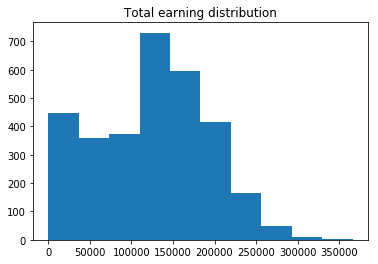

In [59]:
plt.hist(Police.TOTAL)
plt.title('Total earning distribution')
#not following normal distribution, more like right skewed.
#Officers with 120k to 170k total earnings account a large proportion.

In [ ]:
# 2. make a scatter plot to see the relation between regular and overtime

In [66]:
x= Police.REGULAR/10000
y= Police.OVERTIME/10000

p = figure(title='Relation between regular earning and overtime earning (*10000)',
           x_axis_label='regular earning', y_axis_label='overtime eraning')
p.circle(
    x, y,
    color='orange')
show(p)
#we can notice that officers with 8
#Between 0k-8k, officers tends to work late with the increase of regular earnings.
#Officers with over 10k regular earnings seldom work over time.

In [ ]:
#3. make a regression plot to see how is relation between total earning and incentive.

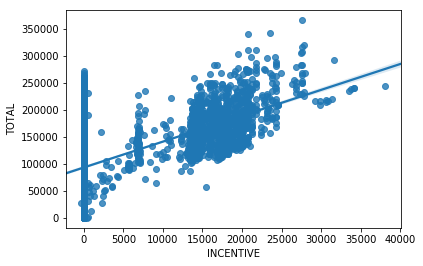

In [98]:
x= Police['INCENTIVE']
y= Police['TOTAL']

sns.regplot(x,y,data = Police)
# We can notice that police officers who earn 12500 - 24000 incentive accounts most.
# There are some extreme data, most of them are injured.
#However, we can see ther is not a very strong relation between incentive and total.

In [99]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

results = smf.ols('REGULAR ~ TOTAL', data = Police).fit()
print(results.params)
results.summary()
#Create a linear regression model. Looks like don't have strong relation.

Intercept    19572.043500
TOTAL            0.430948
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                REGULAR   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     6867.
Date:                Sat, 31 Mar 2018   Prob (F-statistic):               0.00
Time:                        18:40:45   Log-Likelihood:                -35630.
No. Observations:                3149   AIC:                         7.126e+04
Df Residuals:                    3147   BIC:                         7.128e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.957e+04    736.675     26.568      0.000    1.81e+04     2.1e+04
TOTAL          0.4309      0.005     82.868      0.000       0.421       0.441
==============================================================================
Omnibus:                      452.904   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1176.673
Skew:                          -0.792   Prob(JB):                    3.08e-256
Kurtosis:                       5.541   Cond. No.                     2.95e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""